# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuysk
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | sidrolandia
Processing Record 4 of Set 1 | xilin hot
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tralee
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | palopo
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | calchaqui
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | hayma'
City not found. Skipping...
Processing Record 14 of Set 1 | ola
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | rocky mountain house
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | jamestown
Processing Recor

Processing Record 43 of Set 4 | mahibadhoo
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | kenora
Processing Record 46 of Set 4 | delijan
Processing Record 47 of Set 4 | rongelap
Processing Record 48 of Set 4 | shizunai-furukawacho
Processing Record 49 of Set 4 | murray bridge
Processing Record 0 of Set 5 | muisne
Processing Record 1 of Set 5 | caleta de carquin
Processing Record 2 of Set 5 | port isabel
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | puerto cabezas
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 5 | isafjordur
Processing Record 10 of Set 5 | sim
Processing Record 11 of Set 5 | tura
Processing Record 12 of Set 5 | yangor
City not found. Skipping...
Processing Record 13 of Set 5 | vorkuta
Processing Record 14 of Set 5 | khurai
Processing Record 15 of S

Processing Record 33 of Set 8 | zaozersk
Processing Record 34 of Set 8 | revda
Processing Record 35 of Set 8 | tazovsky
Processing Record 36 of Set 8 | greymouth
Processing Record 37 of Set 8 | haiku-pauwela
Processing Record 38 of Set 8 | ulsteinvik
Processing Record 39 of Set 8 | gao
Processing Record 40 of Set 8 | undurkhaan
Processing Record 41 of Set 8 | el bauga
Processing Record 42 of Set 8 | smithers
Processing Record 43 of Set 8 | tabou
Processing Record 44 of Set 8 | luuq
Processing Record 45 of Set 8 | la junta
Processing Record 46 of Set 8 | mirador
Processing Record 47 of Set 8 | nizhneangarsk
Processing Record 48 of Set 8 | imbert
Processing Record 49 of Set 8 | bardai
Processing Record 0 of Set 9 | kimbe
Processing Record 1 of Set 9 | barra de santo antonio
Processing Record 2 of Set 9 | itoman
Processing Record 3 of Set 9 | luena
Processing Record 4 of Set 9 | louhans
Processing Record 5 of Set 9 | ambodifotatra
Processing Record 6 of Set 9 | nishinoomote
Processing Rec

Processing Record 23 of Set 12 | mont-dore
Processing Record 24 of Set 12 | antofagasta
Processing Record 25 of Set 12 | miri
Processing Record 26 of Set 12 | siwa oasis
Processing Record 27 of Set 12 | usinsk
Processing Record 28 of Set 12 | suntar
Processing Record 29 of Set 12 | lubang
Processing Record 30 of Set 12 | hilo
Processing Record 31 of Set 12 | klamath falls
Processing Record 32 of Set 12 | yamada
Processing Record 33 of Set 12 | susuman
Processing Record 34 of Set 12 | campbellton
Processing Record 35 of Set 12 | mohr
Processing Record 36 of Set 12 | quang ngai
Processing Record 37 of Set 12 | nouadhibou
Processing Record 38 of Set 12 | gasa
Processing Record 39 of Set 12 | dunay
Processing Record 40 of Set 12 | dolyna
Processing Record 41 of Set 12 | pitoa
Processing Record 42 of Set 12 | aberdeen
Processing Record 43 of Set 12 | la sierpe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuysk,63.7553,121.6247,-26.67,99,68,1.79,RU,1706118360
1,mount isa,-20.7333,139.5000,27.87,83,75,0.00,AU,1706118360
2,sidrolandia,-20.9319,-54.9614,31.16,39,49,3.65,BR,1706118360
3,xilin hot,43.9667,116.0333,-19.18,92,5,3.79,CN,1706118360
4,port-aux-francais,-49.3500,70.2167,5.42,70,71,13.83,TF,1706118360


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuysk,63.7553,121.6247,-26.67,99,68,1.79,RU,1706118360
1,mount isa,-20.7333,139.5000,27.87,83,75,0.00,AU,1706118360
2,sidrolandia,-20.9319,-54.9614,31.16,39,49,3.65,BR,1706118360
3,xilin hot,43.9667,116.0333,-19.18,92,5,3.79,CN,1706118360
4,port-aux-francais,-49.3500,70.2167,5.42,70,71,13.83,TF,1706118360


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

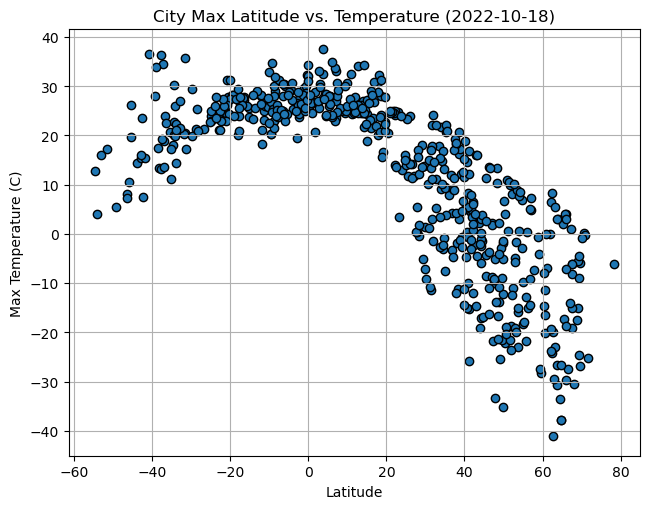

In [39]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

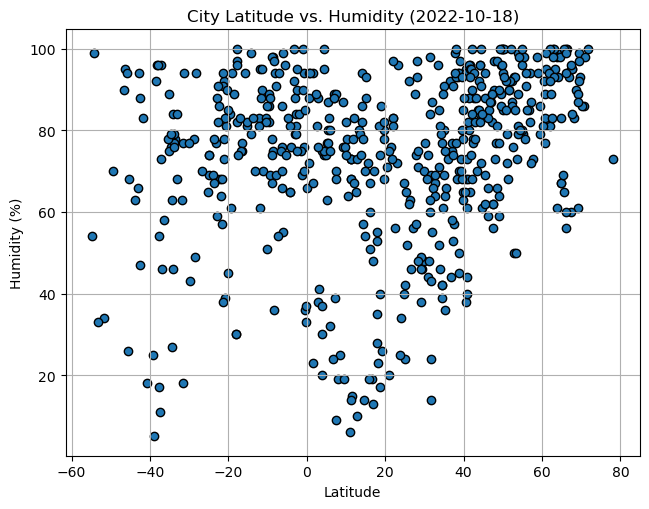

In [40]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

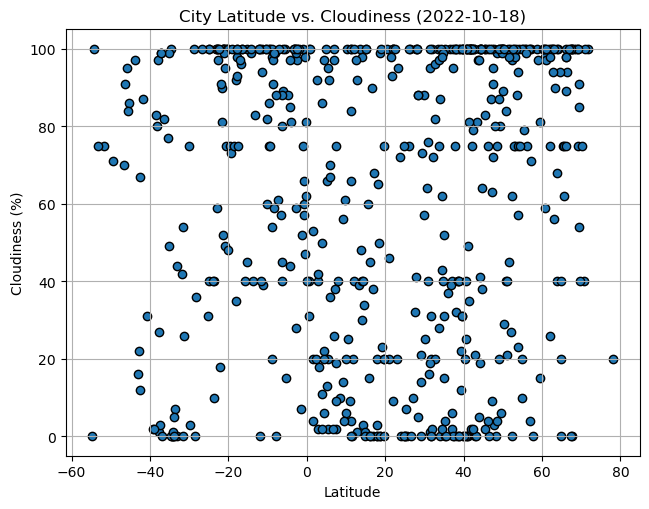

In [41]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

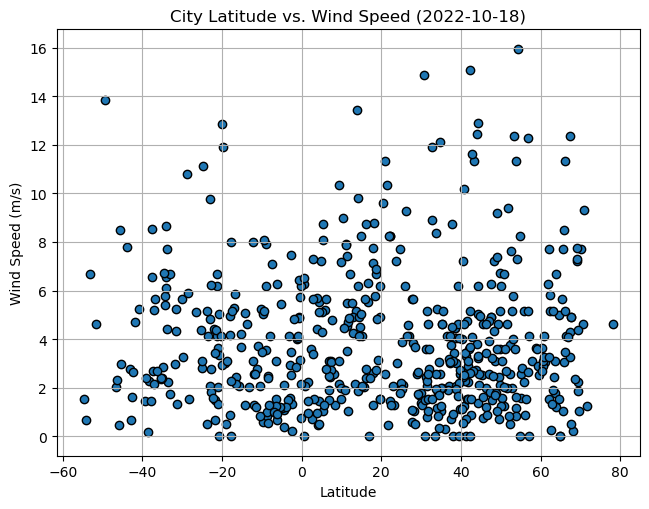

In [42]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    # Calculate the slope, intercept, and r-value of the linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot of the data
    plt.scatter(x, y)

    # Add the linear regression line to the plot
    plt.plot(x, slope * x + intercept, color='red')
    
    # Add a title and labels to the plot
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f'The r-value is: {r_value}')
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line, xy, fontsize = 14, color = "red")


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuysk,63.7553,121.6247,-26.67,99,68,1.79,RU,1706118360
3,xilin hot,43.9667,116.0333,-19.18,92,5,3.79,CN,1706118360
5,tralee,52.2704,-9.7026,8.14,87,0,2.57,IE,1706118360
6,cabo san lucas,22.8909,-109.9124,24.78,72,20,2.06,MX,1706118178
11,bilibino,68.0546,166.4372,-30.45,83,100,0.21,RU,1706118361


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount isa,-20.7333,139.5000,27.87,83,75,0.00,AU,1706118360
2,sidrolandia,-20.9319,-54.9614,31.16,39,49,3.65,BR,1706118360
4,port-aux-francais,-49.3500,70.2167,5.42,70,71,13.83,TF,1706118360
7,adamstown,-25.0660,-130.1015,24.00,74,100,2.80,PN,1706118361
8,palopo,-2.9996,120.1921,25.70,79,100,1.44,ID,1706118361


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8197740894762853


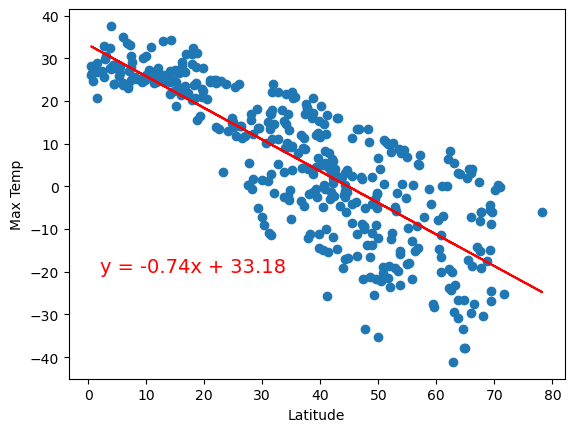

In [74]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
y_label = "Max Temp"
xy = (2,-20)
create_linear_regression_plot(x, y)

The r-value is: 0.5803497400156037


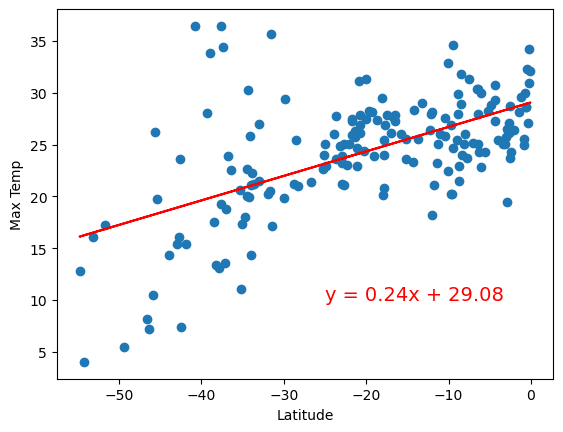

In [76]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
y_label = "Max Temp"
xy = (-25,10)
create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** Both plots show that temperatures tend to rise the closer the latitude gets to 0, or the equator. Therefore, there is a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43063893726645963


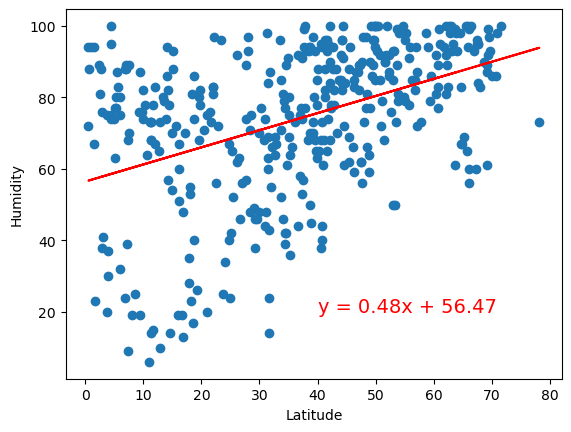

In [79]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
y_label = "Humidity"
xy = (40,20)
create_linear_regression_plot(x, y)

The r-value is: 0.25739863987724326


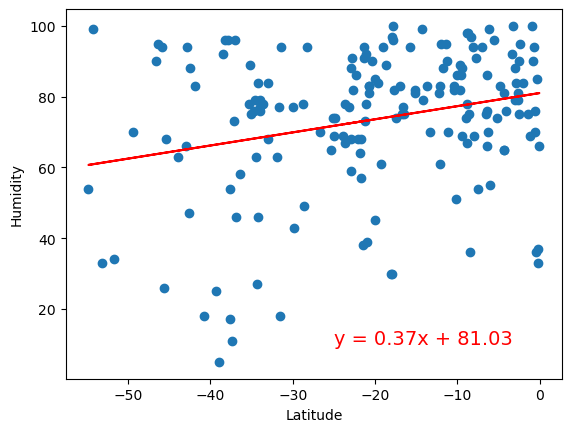

In [80]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
y_label = "Humidity"
xy = (-25,10)
create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** Both plots show a positive correlation between latitude and humidity, but the northern hemisphere has a stronger relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3090366111613588


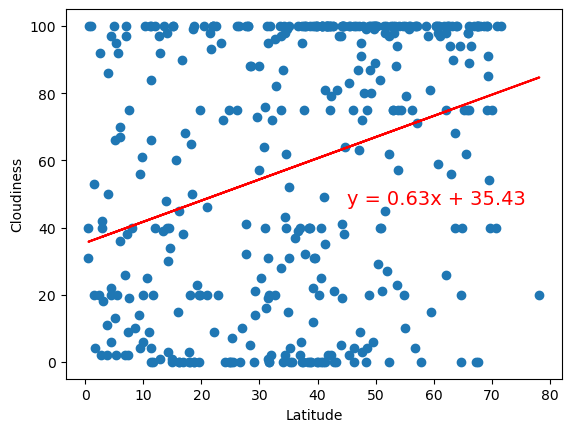

In [85]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
xy = (45,47)
create_linear_regression_plot(x, y)

The r-value is: 0.2872280529667049


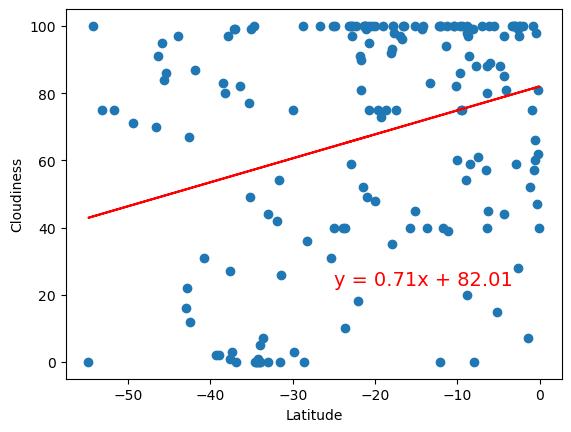

In [88]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
xy = (-25,23)
create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** There does not seem to be a very strong relationship between latitude and cloudiness for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.018105566494229293


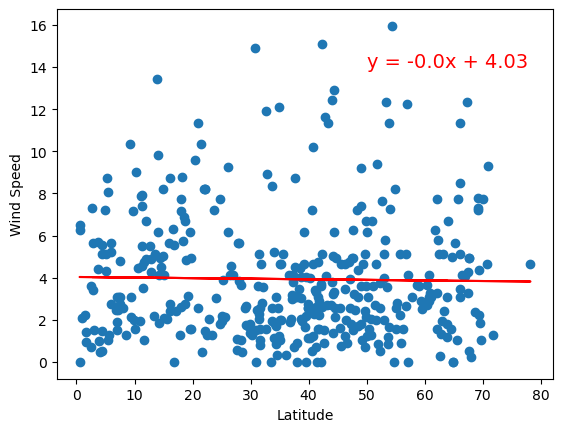

In [91]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
xy = (50,14)
create_linear_regression_plot(x, y)

The r-value is: -0.1641328221477205


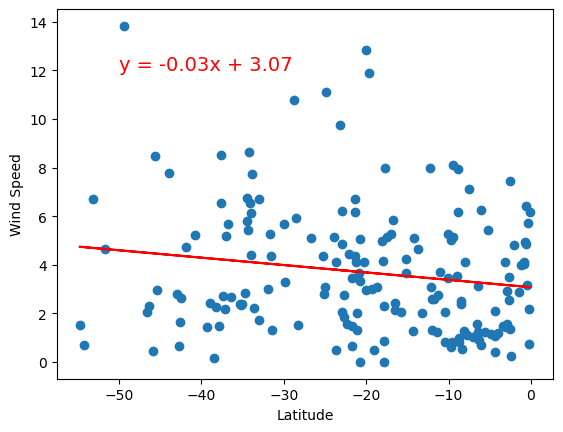

In [94]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
xy = (-50,12)
create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** There also does not appear to be a strong relationship between latitude and wind speed for either hemishphere, but most cities in bothe hemispheres seem to experience lower wind speeds.